Loaded: spotify_tracks_Encoding.csv  shape: (113999, 22)


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_genre_encoded
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,0
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,0
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,0
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,0
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,0


Numeric columns: ['Unnamed: 0', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre_encoded']


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,113999.0,56999.421925,32909.243463,0.000,28499.5000,56999.000000,85499.5000,113999.000
popularity,113999.0,33.238827,22.304959,0.000,17.0000,35.000000,50.0000,100.000
duration_ms,113999.0,228031.153387,107296.057716,8586.000,174066.0000,212906.000000,261506.0000,5237295.000
explicit,113999.0,0.085501,0.279627,0.000,0.0000,0.000000,0.0000,1.000
danceability,113999.0,0.566801,0.173543,0.000,0.4560,0.580000,0.6950,0.985
energy,113999.0,0.641383,0.251530,0.000,0.4720,0.685000,0.8540,1.000
key,113999.0,5.309126,3.559999,0.000,2.0000,5.000000,8.0000,11.000
loudness,113999.0,-8.258950,5.029357,-49.531,-10.0130,-7.004000,-5.0030,4.532
mode,113999.0,0.637558,0.480708,0.000,0.0000,1.000000,1.0000,1.000
speechiness,113999.0,0.084652,0.105733,0.000,0.0359,0.048900,0.0845,0.965


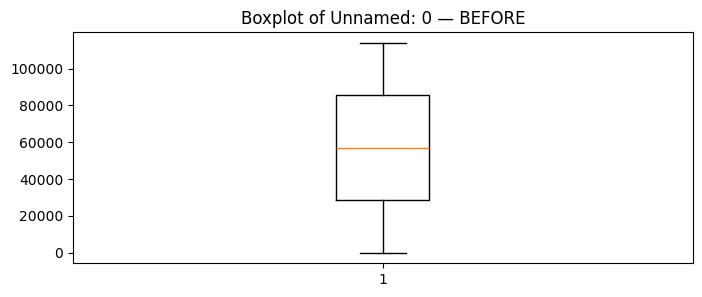

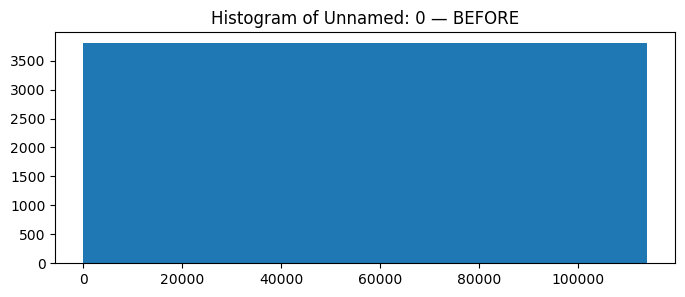

Outlier counts per numeric column (IQR):


instrumentalness       25246
speechiness            13211
time_signature         12157
explicit                9747
liveness                8642
loudness                6173
duration_ms             5616
danceability             620
tempo                    617
popularity                 2
Unnamed: 0                 0
valence                    0
mode                       0
acousticness               0
key                        0
energy                     0
track_genre_encoded        0
dtype: int64

Rows flagged (any numeric column): 55739 of 113999 (48.89%)
After removal shape: (58260, 22)


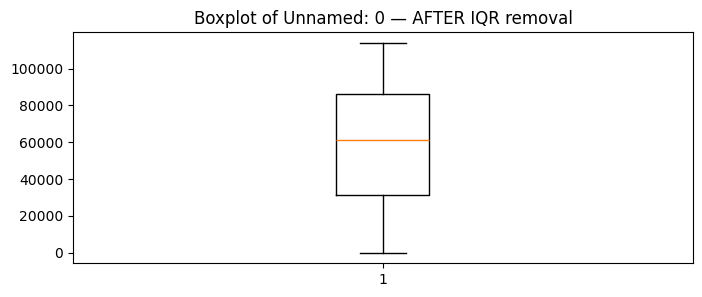

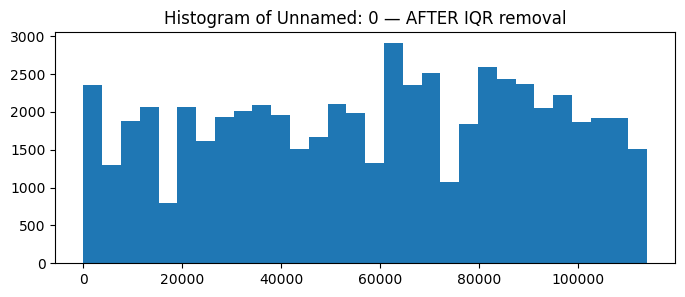

Rows flagged by z-score (|z|>3) in any numeric column: 17875 of 113999
Saved cleaned CSV to: spotify_tracks_cleaned_IQR.csv


In [4]:
# Outlier removal demo (IQR method)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from scipy import stats

# adjust path if needed
csv_path = Path("spotify_tracks_Encoding.csv")  # or "spotify_tracks_Encoding.csv"

if not csv_path.exists():
    raise FileNotFoundError(f"CSV not found at {csv_path}. Please extract the .rar and place the csv here.")

# 1) Load
df = pd.read_csv(csv_path)
print("Loaded:", csv_path, " shape:", df.shape)
display(df.head())

# 2) Numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", num_cols)
if len(num_cols)==0:
    raise ValueError("No numeric columns found. Convert appropriate columns to numeric before outlier removal.")

# 3) Show basic stats
display(df[num_cols].describe().T)

# 4) Visualize first numeric column before cleaning
col = num_cols[0]
plt.figure(figsize=(8,3))
plt.boxplot(df[col].dropna())
plt.title(f"Boxplot of {col} — BEFORE")
plt.show()

plt.figure(figsize=(8,3))
plt.hist(df[col].dropna(), bins=30)
plt.title(f"Histogram of {col} — BEFORE")
plt.show()

# 5) IQR-based outlier detection (per numeric column)
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# boolean mask of outliers per column
outlier_mask = pd.DataFrame(False, index=df.index, columns=num_cols)
for c in num_cols:
    outlier_mask[c] = (df[c] < lower[c]) | (df[c] > upper[c])

# counts
outlier_counts = outlier_mask.sum().sort_values(ascending=False)
print("Outlier counts per numeric column (IQR):")
display(outlier_counts)

any_outlier = outlier_mask.any(axis=1)
n_outlier_rows = any_outlier.sum()
print(f"Rows flagged (any numeric column): {n_outlier_rows} of {len(df)} ({n_outlier_rows/len(df):.2%})")

# 6) Option: remove rows that have any outlier (IQR)
df_clean_iqr = df.loc[~any_outlier].copy()
print("After removal shape:", df_clean_iqr.shape)

# 7) Visualize same column after cleaning
plt.figure(figsize=(8,3))
plt.boxplot(df_clean_iqr[col].dropna())
plt.title(f"Boxplot of {col} — AFTER IQR removal")
plt.show()

plt.figure(figsize=(8,3))
plt.hist(df_clean_iqr[col].dropna(), bins=30)
plt.title(f"Histogram of {col} — AFTER IQR removal")
plt.show()

# 8) Alternative check: z-score method (for comparison)
z_scores = np.abs(stats.zscore(df[num_cols].fillna(0)))
z_mask = (z_scores > 3)
z_any = z_mask.any(axis=1)
print("Rows flagged by z-score (|z|>3) in any numeric column:", z_any.sum(), "of", len(df))

# 9) Save cleaned CSV
out_path = Path("spotify_tracks_cleaned_IQR.csv")
df_clean_iqr.to_csv(out_path, index=False)
print("Saved cleaned CSV to:", out_path)
